In [30]:
import pandas as pd
import numpy as np
import json

In [31]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [32]:
df.shape

(28619, 3)

In [33]:
data = df.drop(columns = "article_link")

In [34]:
data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [35]:
data.shape

(28619, 2)

In [36]:
data.isnull()

,is_sarcastic,headline
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
28614,False,False
28615,False,False
28616,False,False
28617,False,False


In [37]:
data.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

In [39]:
import os

In [40]:
def remove_punctuation(headline):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return headline.translate(translator)

In [41]:
data['headline'] = data['headline'].apply(remove_punctuation)
data.head(10)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails why congress is falling ...
2,0,eat your veggies 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word stream...
5,0,my white inheritance
6,0,5 ways to file your taxes with less stress
7,1,richard bransons globalwarming donation nearly...
8,1,shadow government getting too large to meet in...
9,0,lots of parents know this scenario


In [42]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# displaying the stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [43]:
print("Number of stopwords: ", len(stop_words))

Number of stopwords:  179


In [48]:
def stopwords(headline):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    headline = [word.lower() for word in headline.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(headline)

In [49]:
data['headline'] = data['headline'].apply(stopwords)
data.head(10)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails congress falling short g...
2,0,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar getting work
4,1,mother comes pretty close using word streaming...
5,0,white inheritance
6,0,5 ways file taxes less stress
7,1,richard bransons globalwarming donation nearly...
8,1,shadow government getting large meet marriott ...
9,0,lots parents know scenario


In [51]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

count_vectorizer = CountVectorizer()

count_vectorizer.fit(data['headline'])

dictionary = count_vectorizer.vocabulary_.items()  

In [52]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

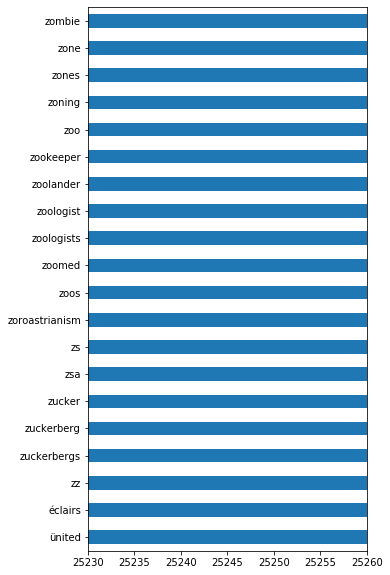

In [53]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

In [54]:
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [55]:
data['healine'] = data['headline'].apply(stemming)
data.head(10)

,is_sarcastic,headline,healine
0,1,thirtysomething scientists unveil doomsday clo...,thirtysometh scientist unveil doomsday clock h...
1,0,dem rep totally nails congress falling short g...,dem rep total nail congress fall short gender ...
2,0,eat veggies 9 deliciously different recipes,eat veggi 9 delici differ recip
3,1,inclement weather prevents liar getting work,inclement weather prevent liar get work
4,1,mother comes pretty close using word streaming...,mother come pretti close use word stream correct
5,0,white inheritance,white inherit
6,0,5 ways file taxes less stress,5 way file tax less stress
7,1,richard bransons globalwarming donation nearly...,richard branson globalwarm donat near much cos...
8,1,shadow government getting large meet marriott ...,shadow govern get larg meet marriott confer ro...
9,0,lots parents know scenario,lot parent know scenario


In [57]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(data['headline'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

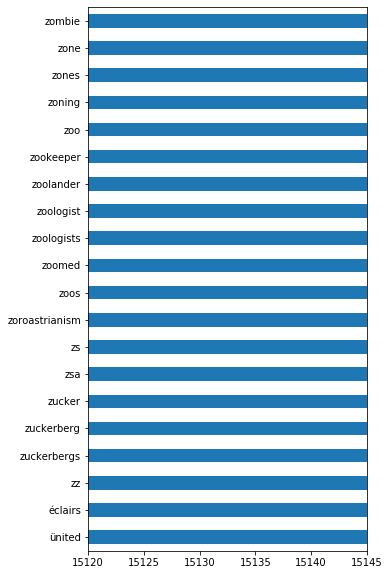

In [58]:
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

In [59]:
def length(headline):    
    '''a function which returns the length of text'''
    return len(headline)

In [60]:
data['length'] = data['headline'].apply(length)
data.head(10)

,is_sarcastic,headline,healine,length
0,1,thirtysomething scientists unveil doomsday clo...,thirtysometh scientist unveil doomsday clock h...,58
1,0,dem rep totally nails congress falling short g...,dem rep total nail congress fall short gender ...,67
2,0,eat veggies 9 deliciously different recipes,eat veggi 9 delici differ recip,43
3,1,inclement weather prevents liar getting work,inclement weather prevent liar get work,44
4,1,mother comes pretty close using word streaming...,mother come pretti close use word stream correct,56
5,0,white inheritance,white inherit,17
6,0,5 ways file taxes less stress,5 way file tax less stress,29
7,1,richard bransons globalwarming donation nearly...,richard branson globalwarm donat near much cos...,77
8,1,shadow government getting large meet marriott ...,shadow govern get larg meet marriott confer ro...,63
9,0,lots parents know scenario,lot parent know scenario,26


In [61]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data['headline'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [62]:
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,29452,29453,29454,29455,29456,29457,29458,29459,29460,29461
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
